In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pyEddyTracker

!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

!pip install basemap

!pip install cartopy

!pip install shapely --no-binary shapely cartopy

!pip install --no-binary shapely shapely --force

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import matplotlib as mpl
import random
import os
from datetime import datetime
from matplotlib import pyplot as plt
from numpy import arange
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


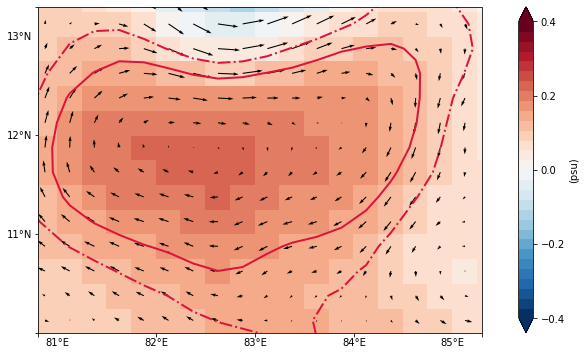

In [ ]:


plt.figure(figsize=(13, 6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80.8, 85.3, 10, 13.3], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80.8, 82, 83, 84, 85.3])
ax.set_yticks([10, 11, 12, 13.3])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(80,86,1))
gl.ylocator = mticker.FixedLocator(np.arange(10, 14, 1))

#gl.xlabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}
#gl.ylabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}





g1 = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

date = datetime(2020, 3, 15)
a, c = g1.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)

m = g1.display(ax, "sla", vmax = 0.4, vmin = -0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))



a.display(ax, color="crimson", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g1.add_uv("adt")
u, v = g1.grid("u").T, g1.grid("v").T
ax.quiver(g1.x_c, g1.y_c, u, v, scale=15, color="black")

#ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.4, -0.4, num=5), label='(psu)')

plt.savefig('drive/MyDrive/2020/sla.png', dpi=300, bbox_inches = "tight")

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SST_BoB/sst_2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SSS_BoB/sss_2020.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


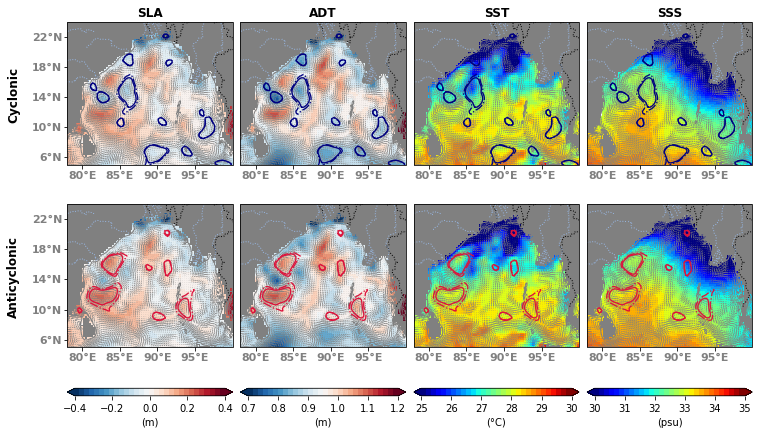

In [ ]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

date = datetime(2020, 8, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


fig = plt.figure(figsize=(15, 8))


###############################  Cyclonic #########################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(241, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m = g.display(ax, "sla", vmin=-0.4, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




#a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SLA', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(-0.15, 0.15, num=5), label='(m)')


############################### Second plot -- ADT #####################################

ax1 = fig.add_subplot(242, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
#ax1.set_yticks([6, 10, 14, 18, 22])

#ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = False
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m2 = g.display(ax1, "adt", vmin=0.7, vmax=1.2, cmap = plt.cm.get_cmap("RdBu_r", 30))




#a.display(ax1, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax1, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax1.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax1.legend(loc='upper right', fontsize = 8)

#ax1.annotate('(b)MAM', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('ADT', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m2, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(243, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80, 85, 90, 95])
#ax3.set_yticks([6, 10, 14, 18, 22])

#ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = False
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SST_BoB/sst_2020.nc', "lon", "lat",)

m3 = g3.display(ax3, "sst", vmin=25, vmax=30, cmap = plt.cm.get_cmap("jet", 30))




#a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax3.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax3.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SST', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(25, 30, num=6), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax4 = fig.add_subplot(244, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
#ax4.set_yticks([6, 10, 14, 18, 22])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SSS_BoB/sss_2020.nc', "lon", "lat",)

m4 = g4.display(ax4, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))



#a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax4, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax4.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax4.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SSS', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(31, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

#plt.savefig('drive/MyDrive/2020/seasonal_a.png', dpi=300, bbox_inches = "tight")

################################## Anticyclonic ######################

############################### First Plot -- SLA ##################################

ax5 = fig.add_subplot(245, projection=ccrs.PlateCarree())
ax5.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax5.add_feature(cfeature.LAND, color = 'gray')
ax5.add_feature(cfeature.COASTLINE, color = 'gray')
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax5.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax5.set_xticks([80, 85, 90, 95])
ax5.set_yticks([6, 10, 14, 18, 22])

ax5.set_yticklabels([])
ax5.set_xticklabels([])

gl5 = ax5.gridlines()
gl5.bottom_labels = True
gl5.left_labels = True
gl5.xlines = False
gl5.ylines = False

gl5.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl5.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl5.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl5.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m5 = g.display(ax5, "sla", vmin=-0.4, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




a.display(ax5, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax5, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax5.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax5.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m5, extend='both', orientation = 'horizontal', ticks=np.linspace(-0.4, 0.4, num=5), label='(m)')


############################### Second plot -- ADT #####################################

ax6 = fig.add_subplot(246, projection=ccrs.PlateCarree())
ax6.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax6.add_feature(cfeature.LAND, color = 'gray')
ax6.add_feature(cfeature.COASTLINE, color = 'gray')
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax6.set_xticks([80, 85, 90, 95])
#ax6.set_yticks([6, 10, 14, 18, 22])

#ax6.set_yticklabels([])
ax6.set_xticklabels([])

gl6 = ax6.gridlines()
gl6.bottom_labels = True
gl6.left_labels = False
gl6.xlines = False
gl6.ylines = False

gl6.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl6.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl6.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl6.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m6 = g.display(ax6, "adt", vmin=0.7, vmax=1.2, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 4, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax6, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax6, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax6.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax1.legend(loc='upper right', fontsize = 8)

#ax6.annotate('(b)MAM', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m6, extend='both', orientation = 'horizontal', ticks=np.linspace(0.7, 1.2, num=6), label='(m)')


############################# Third Plot -- SST ############################

ax7 = fig.add_subplot(247, projection=ccrs.PlateCarree())
ax7.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax7.add_feature(cfeature.LAND, color = 'gray')
ax7.add_feature(cfeature.COASTLINE, color = 'gray')
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax7.set_xticks([80, 85, 90, 95])
#ax7.set_yticks([6, 10, 14, 18, 22])

#ax7.set_yticklabels([])
ax7.set_xticklabels([])

gl7 = ax7.gridlines()
gl7.bottom_labels = True
gl7.left_labels = False
gl7.xlines = False
gl7.ylines = False

gl7.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl7.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl7.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl7.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m7 = g3.display(ax7, "sst", vmin=25, vmax=30, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax7, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax7, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax7.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax7.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m7, extend='both', orientation = 'horizontal', ticks=np.linspace(25, 30, num=6), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax8 = fig.add_subplot(248, projection=ccrs.PlateCarree())
ax8.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax8.add_feature(cfeature.LAND, color = 'gray')
ax8.add_feature(cfeature.COASTLINE, color = 'gray')
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax8.set_xticks([80, 85, 90, 95])
#ax8.set_yticks([6, 10, 14, 18, 22])

#ax8.set_yticklabels([])
ax8.set_xticklabels([])

gl8 = ax8.gridlines()
gl8.bottom_labels = True
gl8.left_labels = False
gl8.xlines = False
gl8.ylines = False

gl8.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl8.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl8.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl8.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m8 = g4.display(ax8, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax8, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax8, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax8.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax8.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m8, extend='both', orientation = 'horizontal', ticks=np.linspace(30, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.16, right=0.7, top=None, wspace=None, hspace=None)


plt.savefig('drive/MyDrive/2020/sass.pdf', dpi=300, bbox_inches = "tight")




We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SST_BoB/sst_2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SSS_BoB/sss_2020.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


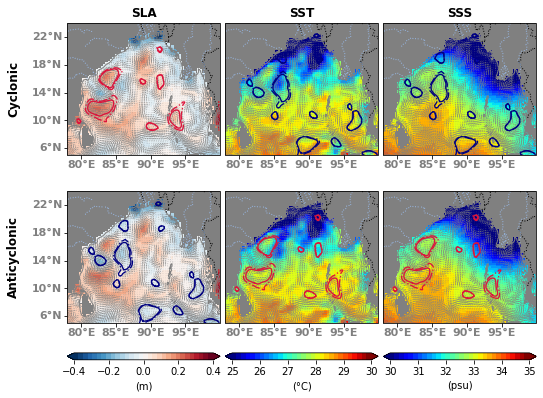

In [ ]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

date = datetime(2020, 8, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


fig = plt.figure(figsize=(15, 8))


###############################  Cyclonic #########################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(231, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m = g.display(ax, "sla", vmin=-0.4, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SLA', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(-0.15, 0.15, num=5), label='(m)')





############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(232, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80, 85, 90, 95])
#ax3.set_yticks([6, 10, 14, 18, 22])

#ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = False
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SST_BoB/sst_2020.nc', "lon", "lat",)

m3 = g3.display(ax3, "sst", vmin=25, vmax=30, cmap = plt.cm.get_cmap("jet", 30))




#a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax3.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax3.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SST', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(25, 30, num=6), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax4 = fig.add_subplot(233, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
#ax4.set_yticks([6, 10, 14, 18, 22])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SSS_BoB/sss_2020.nc', "lon", "lat",)

m4 = g4.display(ax4, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))



#a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax4, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax4.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax4.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SSS', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(31, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

#plt.savefig('drive/MyDrive/2020/seasonal_a.png', dpi=300, bbox_inches = "tight")

################################## Anticyclonic ######################

############################### First Plot -- SLA ##################################

ax5 = fig.add_subplot(234, projection=ccrs.PlateCarree())
ax5.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax5.add_feature(cfeature.LAND, color = 'gray')
ax5.add_feature(cfeature.COASTLINE, color = 'gray')
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax5.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax5.set_xticks([80, 85, 90, 95])
ax5.set_yticks([6, 10, 14, 18, 22])

ax5.set_yticklabels([])
ax5.set_xticklabels([])

gl5 = ax5.gridlines()
gl5.bottom_labels = True
gl5.left_labels = True
gl5.xlines = False
gl5.ylines = False

gl5.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl5.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl5.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl5.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m5 = g.display(ax5, "sla", vmin=-0.4, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




#a.display(ax5, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax5, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax5.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax5.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m5, extend='both', orientation = 'horizontal', ticks=np.linspace(-0.4, 0.4, num=5), label='(m)')




############################# Third Plot -- SST ############################

ax7 = fig.add_subplot(235, projection=ccrs.PlateCarree())
ax7.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax7.add_feature(cfeature.LAND, color = 'gray')
ax7.add_feature(cfeature.COASTLINE, color = 'gray')
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax7.set_xticks([80, 85, 90, 95])
#ax7.set_yticks([6, 10, 14, 18, 22])

#ax7.set_yticklabels([])
ax7.set_xticklabels([])

gl7 = ax7.gridlines()
gl7.bottom_labels = True
gl7.left_labels = False
gl7.xlines = False
gl7.ylines = False

gl7.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl7.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl7.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl7.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m7 = g3.display(ax7, "sst", vmin=25, vmax=30, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax7, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax7, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax7.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax7.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m7, extend='both', orientation = 'horizontal', ticks=np.linspace(25, 30, num=6), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax8 = fig.add_subplot(236, projection=ccrs.PlateCarree())
ax8.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax8.add_feature(cfeature.LAND, color = 'gray')
ax8.add_feature(cfeature.COASTLINE, color = 'gray')
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax8.set_xticks([80, 85, 90, 95])
#ax8.set_yticks([6, 10, 14, 18, 22])

#ax8.set_yticklabels([])
ax8.set_xticklabels([])

gl8 = ax8.gridlines()
gl8.bottom_labels = True
gl8.left_labels = False
gl8.xlines = False
gl8.ylines = False

gl8.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl8.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl8.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl8.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m8 = g4.display(ax8, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax8, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax8, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax8.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax8.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m8, extend='both', orientation = 'horizontal', ticks=np.linspace(30, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.3, right=0.5, top=None, wspace=None, hspace=None)


#plt.savefig('drive/MyDrive/2020/sss.pdf', dpi=300, bbox_inches = "tight")




We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SST_BoB/sst_2020.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SSS_BoB/sss_2020.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


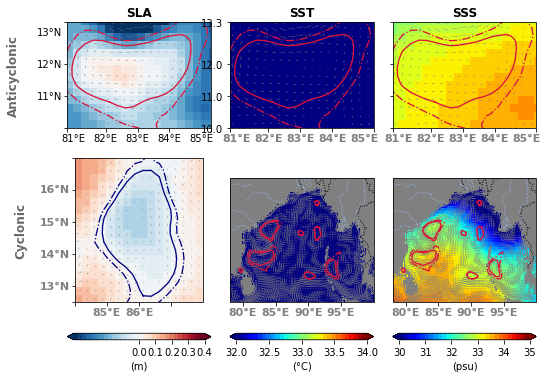

In [ ]:
g = RegularGridDataset('drive/MyDrive/2020/SLA/2020.nc', "longitude", "latitude",)

date = datetime(2020, 8, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


fig = plt.figure(figsize=(15, 8))


###############################  Cyclonic #########################################

############################### First Plot -- SLA ##################################

ax = fig.add_subplot(231, projection=ccrs.PlateCarree())
ax.set_extent([80.8, 85.3, 10, 13.3], ccrs.PlateCarree()) 
ax.set_xticks([80.8, 82, 83, 84, 85.3])
ax.set_yticks([10, 11, 12, 13.3])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(80,86,1))
gl.ylocator = mticker.FixedLocator(np.arange(10, 14, 1))

#gl.xlabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}
#gl.ylabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}

ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='dimgray')








m = g.display(ax, "sla", vmin=0, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SLA', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(-0.15, 0.15, num=5), label='(m)')





############################# Third Plot -- SST ############################

ax3 = fig.add_subplot(232, projection=ccrs.PlateCarree())
ax3.set_extent([80.8, 85.3, 10, 13.3], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80.8, 82, 83, 84, 85.3])
ax3.set_yticks([10, 11, 12, 13.3])

#ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = False
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(80,86,1))
gl3.ylocator = mticker.FixedLocator(np.arange(10, 14, 1))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SST_BoB/sst_2020.nc', "lon", "lat",)

m3 = g3.display(ax3, "sst", vmin=32, vmax=34, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax3.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax3.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SST', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(25, 30, num=6), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax4 = fig.add_subplot(233, projection=ccrs.PlateCarree())
ax4.set_extent([80.8, 85.3, 10, 13.3], ccrs.PlateCarree()) 
ax4.set_xticks([80.8, 82, 83, 84, 85.3])
ax4.set_yticks([10, 11, 12, 13.3])


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')



ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(80,86,1))
gl4.ylocator = mticker.FixedLocator(np.arange(10, 14, 1))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SSS_BoB/sss_2020.nc', "lon", "lat",)

m4 = g4.display(ax4, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))



a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax4, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax4.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax4.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('SSS', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(31, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

#plt.savefig('drive/MyDrive/2020/seasonal_a.png', dpi=300, bbox_inches = "tight")

################################## Anticyclonic ######################

############################### First Plot -- SLA ##################################

ax5 = fig.add_subplot(234, projection=ccrs.PlateCarree())
ax5.set_extent([84, 88, 12.5, 17], ccrs.PlateCarree()) 


ax5.add_feature(cfeature.LAND, color = 'gray')
ax5.add_feature(cfeature.COASTLINE, color = 'gray')
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.RIVERS, linestyle=':')

ax5.set_xticks([84, 85, 86, 87])
ax5.set_yticks([12.5, 13, 14,15, 16, 17])

ax5.set_yticklabels([])
ax5.set_xticklabels([])

gl5 = ax5.gridlines()
gl5.bottom_labels = True
gl5.left_labels = True
gl5.xlines = False
gl5.ylines = False

gl5.xlocator = mticker.FixedLocator(np.arange(84,87,1))
gl5.ylocator = mticker.FixedLocator(np.arange(12,17,1))




gl5.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl5.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

ax5.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='dimgray')

m5 = g.display(ax5, "sla", vmin=-0.4, vmax=0.4, cmap = plt.cm.get_cmap("RdBu_r", 30))




#a.display(ax5, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax5, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax5.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

#ax5.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m5, extend='both', orientation = 'horizontal', ticks=np.linspace(0, 0.4, num=5), label='(m)')




############################# Third Plot -- SST ############################

ax7 = fig.add_subplot(235, projection=ccrs.PlateCarree())
ax7.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax7.add_feature(cfeature.LAND, color = 'gray')
ax7.add_feature(cfeature.COASTLINE, color = 'gray')
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax7.set_xticks([80, 85, 90, 95])
#ax7.set_yticks([6, 10, 14, 18, 22])

#ax7.set_yticklabels([])
ax7.set_xticklabels([])

gl7 = ax7.gridlines()
gl7.bottom_labels = True
gl7.left_labels = False
gl7.xlines = False
gl7.ylines = False

gl7.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl7.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl7.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl7.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m7 = g3.display(ax7, "sst", vmin=32, vmax=34, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax7, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax7, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax7.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

#ax7.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


plt.colorbar(m7, extend='both', orientation = 'horizontal', ticks=np.linspace(32, 34, num=5), label='(°C)')

######################## Fourth Plot -- SSS #######################

ax8 = fig.add_subplot(236, projection=ccrs.PlateCarree())
ax8.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax8.add_feature(cfeature.LAND, color = 'gray')
ax8.add_feature(cfeature.COASTLINE, color = 'gray')
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax8.set_xticks([80, 85, 90, 95])
#ax8.set_yticks([6, 10, 14, 18, 22])

#ax8.set_yticklabels([])
ax8.set_xticklabels([])

gl8 = ax8.gridlines()
gl8.bottom_labels = True
gl8.left_labels = False
gl8.xlines = False
gl8.ylines = False

gl8.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl8.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl8.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl8.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}



m8 = g4.display(ax8, "sos", vmin=30, vmax=35, cmap = plt.cm.get_cmap("jet", 30))




a.display(ax8, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax8, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax8.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

#ax8.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

#plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

plt.colorbar(m8, extend='both', orientation = 'horizontal', ticks=np.linspace(30, 35, num=6), label='(psu)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.3, right=0.5, top=None, wspace=None, hspace=None)


#plt.savefig('drive/MyDrive/2020/sss.pdf', dpi=300, bbox_inches = "tight")




We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_djf.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


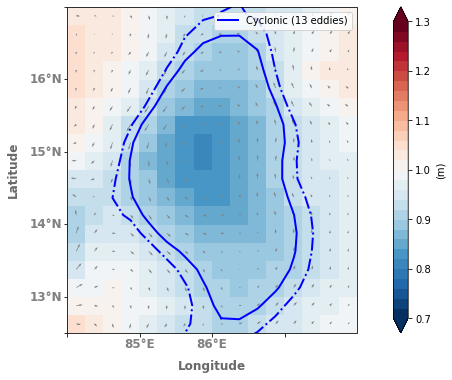

In [ ]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([84, 88, 12.5, 17], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xticks([84, 85, 86, 87])
ax.set_yticks([12.5, 13, 14,15, 16, 17])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(84,87,1))
gl.ylocator = mticker.FixedLocator(np.arange(12,17,1))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')




g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_djf.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')